# Import Library & CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

In [14]:
df_customer = pd.read_csv("data/output/customer_processed.csv")
df_trans = pd.read_csv("data/output/transaction_processed.csv")
df_product = pd.read_csv("data/output/product_processed.csv")
df_merge = pd.read_csv("data/output/merge.csv")
df_daily_sales = pd.read_csv("data/output/daily_sales.csv")
df_daily_sales_detail = pd.read_csv("data/output/daily_sales_detail.csv")

# Convert Object to Date 

In [17]:
df_customer.info()
df_trans.info()
df_product.info()
df_merge.info()
df_daily_sales.info()
df_daily_sales_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    3800 non-null   object
 1   name           3800 non-null   object
 2   hiragana       3800 non-null   object
 3   birth_date     3800 non-null   object
 4   gender         3800 non-null   object
 5   email          3800 non-null   object
 6   phone_number   3800 non-null   object
 7   mobile_number  3800 non-null   object
 8   post_code      3800 non-null   object
 9   address        3800 non-null   object
dtypes: object(10)
memory usage: 297.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2849 entries, 0 to 2848
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   transaction_id     2849 non-null   object
 1   transaction_date   2849 non-null   object
 2   customer_id        2849 non-null   

In [18]:
df_customer['birth_date'] = pd.to_datetime(df_customer['birth_date'], format='%Y-%m-%d')
df_trans['transaction_date'] = pd.to_datetime(df_trans['transaction_date'], format='%Y-%m-%d')
df_trans['shipping_date'] = pd.to_datetime(df_trans['shipping_date'], format='%Y-%m-%d')
df_trans['cancellation_date'] = pd.to_datetime(df_trans['cancellation_date'], format='%Y-%m-%d')
df_merge['birth_date'] = pd.to_datetime(df_merge['birth_date'], format='%Y-%m-%d')
df_merge['transaction_date'] = pd.to_datetime(df_merge['transaction_date'], format='%Y-%m-%d')
df_merge['shipping_date'] = pd.to_datetime(df_merge['shipping_date'], format='%Y-%m-%d')
df_merge['cancellation_date'] = pd.to_datetime(df_merge['cancellation_date'], format='%Y-%m-%d')
df_daily_sales['transaction_date'] = pd.to_datetime(df_daily_sales['transaction_date'], format='%Y-%m-%d')
df_daily_sales_detail['transaction_date'] = pd.to_datetime(df_daily_sales_detail['transaction_date'], format='%Y-%m-%d')

# Data Visualization

## Time Series

### Daily Sales

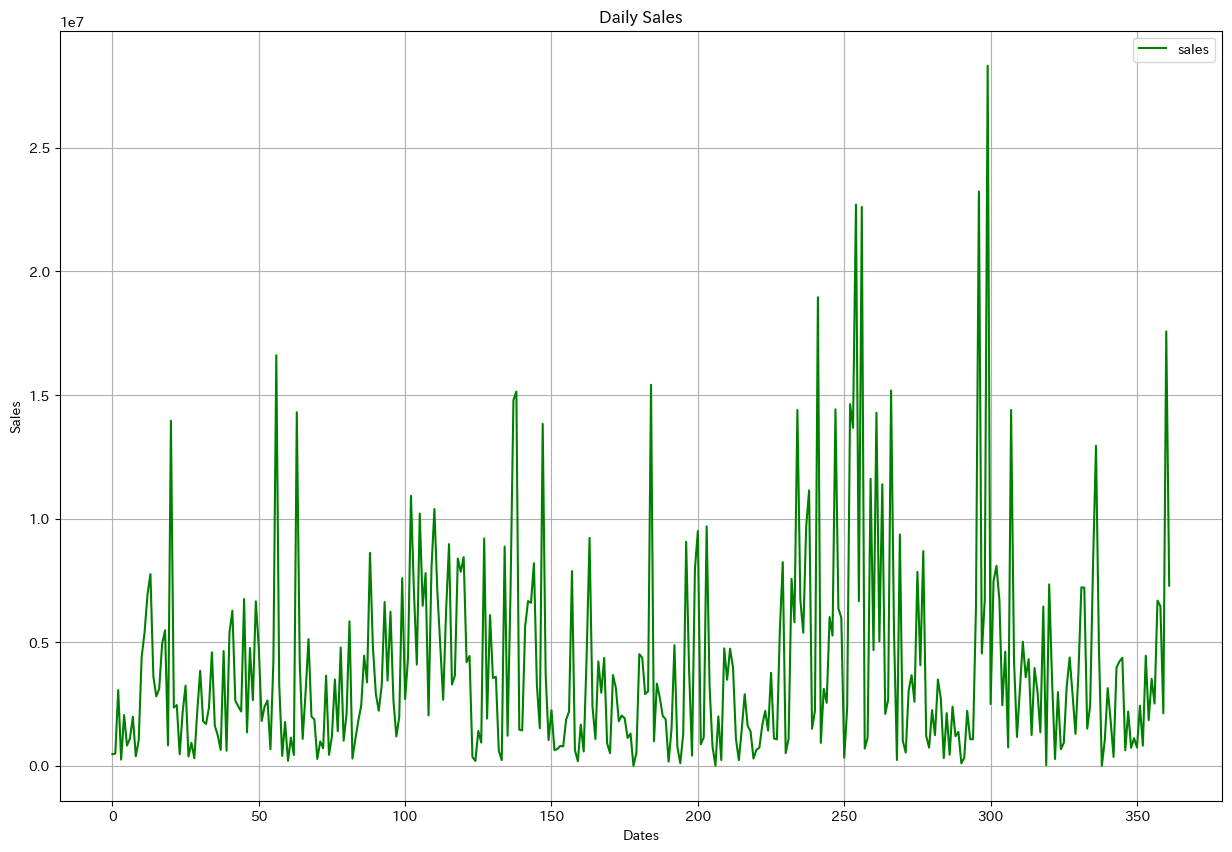

In [19]:
plt.figure(figsize=(15,10))
plt.plot(df_daily_sales['sales'],linestyle='-', color='green', label='sales')

plt.title('Daily Sales')
plt.xlabel('Dates')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

### Daily Sales - Filter by Date

                     sales
transaction_date          
2020-01-02          779400
2020-01-03            1230
2020-01-04         1992800
2020-01-05          231400
2020-01-06         4749100
...                    ...
2020-03-23         2095132
2020-03-24         2670482
2020-03-26        15180640
2020-03-29         5425063
2020-03-30          231400

[64 rows x 1 columns]


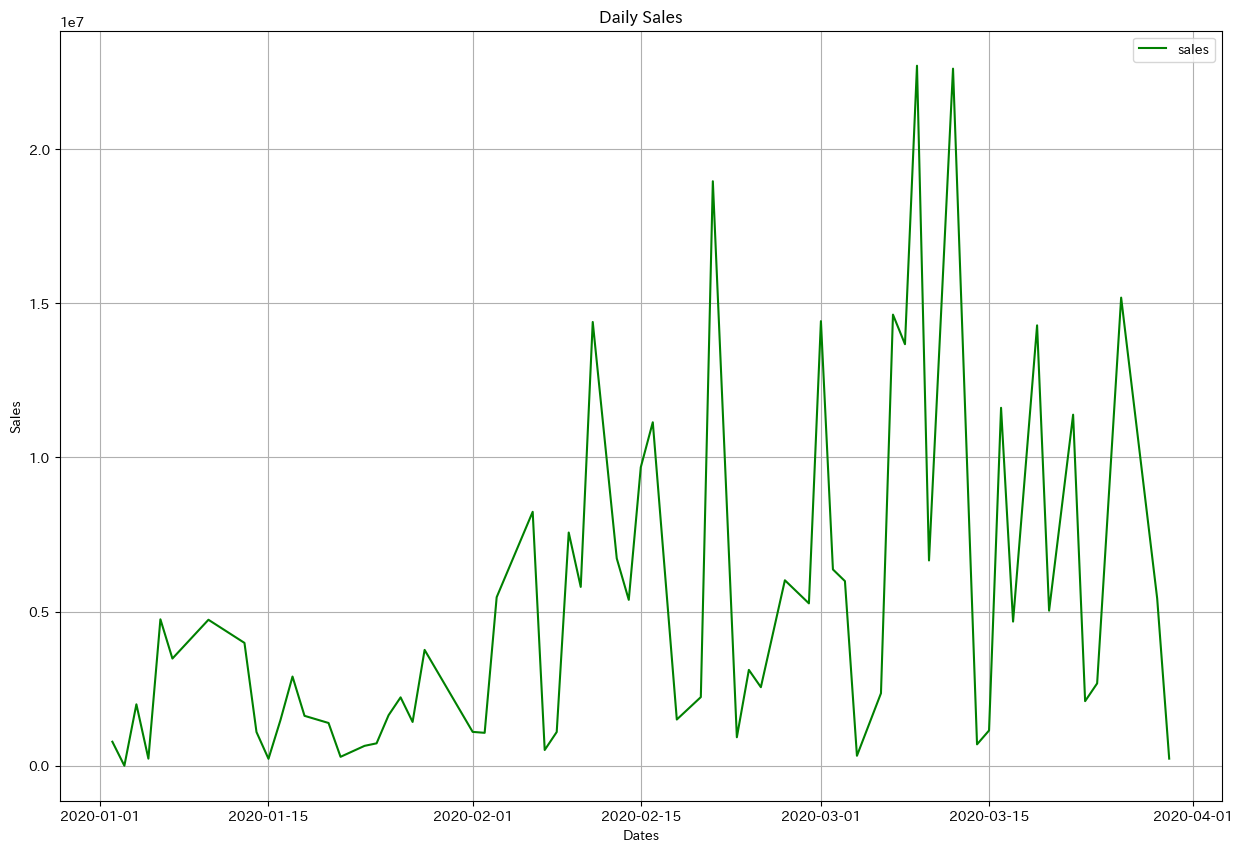

,sales
transaction_date,
2020-01-02,779400
2020-01-03,1230
2020-01-04,1992800
2020-01-05,231400
2020-01-06,4749100
...,...
2020-03-23,2095132
2020-03-24,2670482
2020-03-26,15180640


In [20]:
# Filter by Date
start_date = "2020-01-01"
end_date = "2020-03-30"
df_daily_sales_filtered = df_daily_sales[["transaction_date", "sales"]]
df_daily_sales_filtered.set_index('transaction_date', inplace=True)
df_daily_sales_filtered = df_daily_sales_filtered.loc[start_date:end_date]
print(df_daily_sales_filtered)

# Plot
plt.figure(figsize=(15,10))
plt.plot(df_daily_sales_filtered['sales'],linestyle='-', color='green', label='sales')
plt.title('Daily Sales')
plt.xlabel('Dates')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()
df_daily_sales_filtered

### Daily Sales - Moving Average

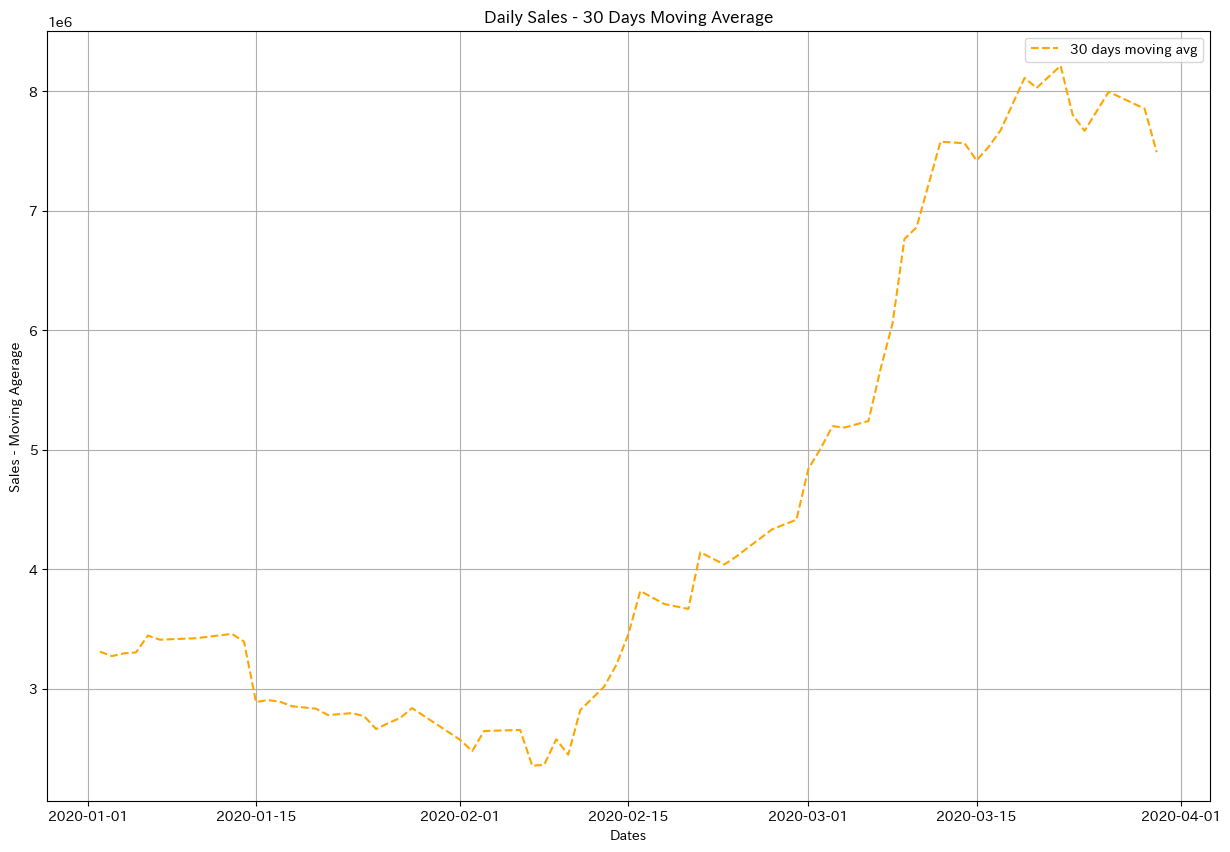

In [21]:
df_daily_sales_moving_avg = df_daily_sales.copy()
# Add "Moving Agerage" Column
df_daily_sales_moving_avg['moving_avg'] = df_daily_sales_moving_avg['sales'].rolling(window=30).mean()

# Filter by Date
start_date = "2020-01-01"
end_date = "2020-03-30"
df_daily_sales_moving_avg.set_index('transaction_date', inplace=True)
df_daily_sales_moving_avg = df_daily_sales_moving_avg.loc[start_date:end_date]

# Plot
plt.figure(figsize=(15,10))
plt.plot(df_daily_sales_moving_avg['moving_avg'], linestyle='--', color='orange', label='30 days moving avg')

plt.title('Daily Sales - 30 Days Moving Average')
plt.xlabel('Dates')
plt.ylabel('Sales - Moving Agerage')
plt.legend()
plt.grid(True)
plt.show()

## Weekly Sales

In [23]:
df_weekly_sales = df_daily_sales.copy()
df_weekly_sales.set_index('transaction_date', inplace=True)
df_weekly_sales = df_weekly_sales.resample("W", closed="left", label="left").sum() # Week starts from Sunday
df_weekly_sales = df_weekly_sales[["sales"]]
df_weekly_sales = df_weekly_sales.rename_axis('date_week')
print(df_weekly_sales)

plt.figure(figsize=(15,10))
plt.plot(df_weekly_sales['sales'], linestyle='--', color='blue', label='Weekly Sales')

plt.title('Weekly Sales')
plt.xlabel('Dates - Week')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [125]:
# Filter the DataFrame for each year and resample to monthly sales
df_weekly_sales_2019 = df_daily_sales_detail[df_daily_sales_detail['year'] == 2019].groupby("week").agg({"sales":"sum"}).reset_index()
df_weekly_sales_2019.rename(columns={"sales": "2019_sales"}, inplace=True)

# df_weekly_sales_2020 = df_daily_sales_detail[df_daily_sales_detail['year'] == 2020].groupby("week").agg({"sales":"sum"}).reset_index()
# df_weekly_sales_2020.rename(columns={"sales": "2020_sales"}, inplace=True)

# # Merge the 2019 and 2020 data
# df_weekly_sales_by_year = pd.merge(df_weekly_sales_2019, df_weekly_sales_2020, on="week", how="outer").set_index("week").sort_values('week')

# # Calculate Year Over Year growth as integers
# df_weekly_sales_by_year['YoY'] = df_weekly_sales_by_year.apply(
#     lambda row: int(round((row['2020_sales'] / row['2019_sales'] - 1) * 100))
#     if pd.notnull(row['2019_sales']) and pd.notnull(row['2020_sales']) else "-", axis=1
# )

# # Format the 'YoY' column as a string with a percentage sign
# df_weekly_sales_by_year['YoY'] = df_weekly_sales_by_year['YoY'].apply(
#     lambda x: f"{x}%" if isinstance(x, int) else x)

# # Convert the sales columns to integers if they are not already
# df_weekly_sales_by_year['2019_sales'] = df_weekly_sales_by_year['2019_sales'].fillna(0).astype(int)
# df_weekly_sales_by_year['2020_sales'] = df_weekly_sales_by_year['2020_sales'].fillna(0).astype(int)

# # Calculate Month over Month (MoM) growth for each year
# df_weekly_sales_by_year['WoW_2019'] = df_weekly_sales_by_year['2019_sales'].pct_change().fillna(0)
# df_weekly_sales_by_year['WoW_2020'] = df_weekly_sales_by_year['2020_sales'].pct_change().fillna(0)

# # Convert the MoM columns to percentage format and round to nearest whole number
# df_weekly_sales_by_year['WoW_2019'] = df_weekly_sales_by_year['WoW_2019'].apply(lambda x: f"{x:.0%}")
# df_weekly_sales_by_year['WoW_2020'] = df_weekly_sales_by_year['WoW_2020'].apply(lambda x: f"{x:.0%}")

# # Replace "inf%" by 0%
# df_weekly_sales_by_year['WoW_2019'] = df_weekly_sales_by_year['WoW_2019'].apply(
#     lambda x: "0%" if x == "inf%" else x)
# df_weekly_sales_by_year['WoW_2020'] = df_weekly_sales_by_year['WoW_2020'].apply(
#     lambda x: "0%" if x == "inf%" else x)


# # Display the DataFrame with pandas' option context to suppress scientific notation
# with pd.option_context('display.float_format', '{:.0f}'.format):
#     display(df_weekly_sales_by_year)

,2019_sales,2020_sales,YoY,WoW_2019,WoW_2020
week,,,,,
1,3219470,3004830,-7%,0%,0%
2,0,12960112,-,-100%,331%
3,0,11301251,-,0%,-13%
4,0,6907643,-,0%,-39%
5,0,7344662,-,0%,6%
6,0,22870018,-,0%,211%
7,0,53112958,-,0%,132%
8,0,23604464,-,0%,-56%
9,0,31354409,-,0%,33%


In [129]:
df_weekly_sales_2019.head()

,week,2019_sales
0,1,3219470
1,14,6308920
2,15,3900408
3,16,5808937
4,17,12322912


In [128]:
df_daily_sales.head()

,transaction_date,sales
0,2019-04-01,465700
1,2019-04-03,487086
2,2019-04-04,3059520
3,2019-04-05,245484
4,2019-04-06,2051130


In [130]:
df_daily_sales_detail.head()

,transaction_date,sales,year,month,week,day_name
0,2019-04-01,465700,2019,4,14,Monday
1,2019-04-03,487086,2019,4,14,Wednesday
2,2019-04-04,3059520,2019,4,14,Thursday
3,2019-04-05,245484,2019,4,14,Friday
4,2019-04-06,2051130,2019,4,14,Saturday


## Monthly Sales

             sales
month             
2019-04   36095177
2019-05   71591919
2019-06  101550323
2019-07   38092911
2019-08  128297953
2019-09  155575023
2019-10   71258429
2019-11   59586072
2019-12   83788661
2020-01   39351596
2020-02  118691014
2020-03  193484188
2020-04   50964346
2020-05  150489643
2020-06   87366538
2020-07   50934567
2020-08   24854630


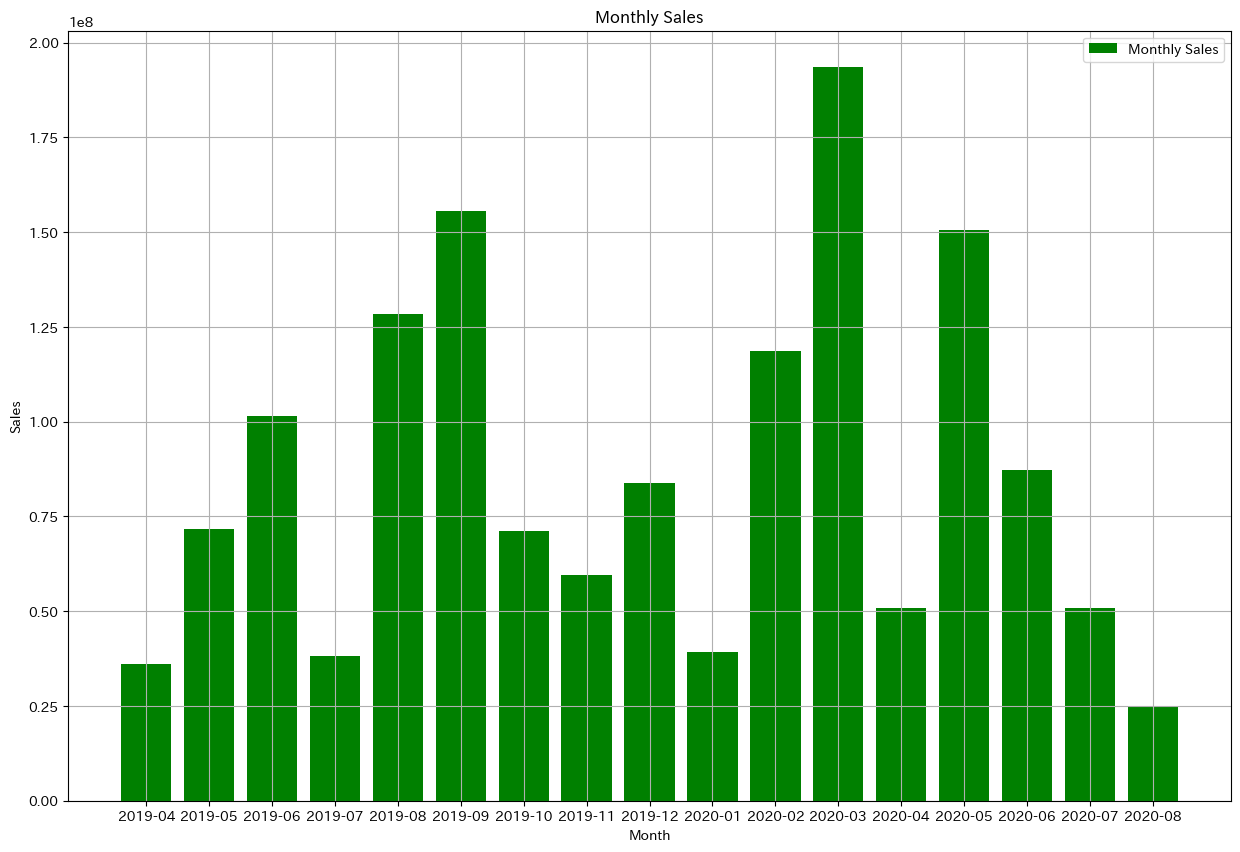

In [30]:
df_monthly_sales = df_daily_sales.copy()
df_monthly_sales.set_index('transaction_date', inplace=True)
df_monthly_sales = df_monthly_sales.resample("MS").sum()
df_monthly_sales = df_monthly_sales[["sales"]]
df_monthly_sales = df_monthly_sales.rename_axis('month')
# Convert 'month' index to string format
df_monthly_sales.index = df_monthly_sales.index.strftime('%Y-%m')
print(df_monthly_sales)

plt.figure(figsize=(15,10))
plt.bar(df_monthly_sales.index, df_monthly_sales['sales'], color='green', label='Monthly Sales')

plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [123]:
# Filter the DataFrame for each year and resample to monthly sales
df_monthly_sales_2019 = df_daily_sales_detail[df_daily_sales_detail['year'] == 2019].groupby("month").agg({"sales":"sum"}).reset_index()
df_monthly_sales_2019.rename(columns={"sales": "2019_sales"}, inplace=True)

df_monthly_sales_2020 = df_daily_sales_detail[df_daily_sales_detail['year'] == 2020].groupby("month").agg({"sales":"sum"}).reset_index()
df_monthly_sales_2020.rename(columns={"sales": "2020_sales"}, inplace=True)

# Merge the 2019 and 2020 data
df_monthly_sales_by_year = pd.merge(df_monthly_sales_2019, df_monthly_sales_2020, on="month", how="outer").set_index("month").sort_values('month')

# Calculate Year Over Year growth as integers
df_monthly_sales_by_year['YoY'] = df_monthly_sales_by_year.apply(
    lambda row: int(round((row['2020_sales'] / row['2019_sales'] - 1) * 100))
    if pd.notnull(row['2019_sales']) and pd.notnull(row['2020_sales']) else "-", axis=1
)

# Format the 'YoY' column as a string with a percentage sign
df_monthly_sales_by_year['YoY'] = df_monthly_sales_by_year['YoY'].apply(
    lambda x: f"{x}%" if isinstance(x, int) else x)

# Convert the sales columns to integers if they are not already
df_monthly_sales_by_year['2019_sales'] = df_monthly_sales_by_year['2019_sales'].fillna(0).astype(int)
df_monthly_sales_by_year['2020_sales'] = df_monthly_sales_by_year['2020_sales'].fillna(0).astype(int)

# Calculate Month over Month (MoM) growth for each year
df_monthly_sales_by_year['MoM_2019'] = df_monthly_sales_by_year['2019_sales'].pct_change().fillna(0)
df_monthly_sales_by_year['MoM_2020'] = df_monthly_sales_by_year['2020_sales'].pct_change().fillna(0)

# Convert the MoM columns to percentage format and round to nearest whole number
df_monthly_sales_by_year['MoM_2019'] = df_monthly_sales_by_year['MoM_2019'].apply(lambda x: f"{x:.0%}")
df_monthly_sales_by_year['MoM_2020'] = df_monthly_sales_by_year['MoM_2020'].apply(lambda x: f"{x:.0%}")

# Replace "inf%" by 0%
df_monthly_sales_by_year['MoM_2019'] = df_monthly_sales_by_year['MoM_2019'].apply(lambda x: "0%" if x == "inf%" else x)
df_monthly_sales_by_year['MoM_2020'] = df_monthly_sales_by_year['MoM_2020'].apply(lambda x: "0%" if x == "inf%" else x)


# Display the DataFrame with pandas' option context to suppress scientific notation
with pd.option_context('display.float_format', '{:.0f}'.format):
    display(df_monthly_sales_by_year)


,2019_sales,2020_sales,YoY,MoM_2019,MoM_2020
month,,,,,
1,0,39351596,-,0%,0%
2,0,118691014,-,0%,202%
3,0,193484188,-,0%,63%
4,36095177,50964346,41%,0%,-74%
5,71591919,150489643,110%,98%,195%
6,101550323,87366538,-14%,42%,-42%
7,38092911,50934567,34%,-62%,-42%
8,128297953,24854630,-81%,237%,-51%
9,155575023,0,-,21%,-100%


In [101]:
df_monthly_sales_2019['2019_sales'].dtype

dtype('int64')

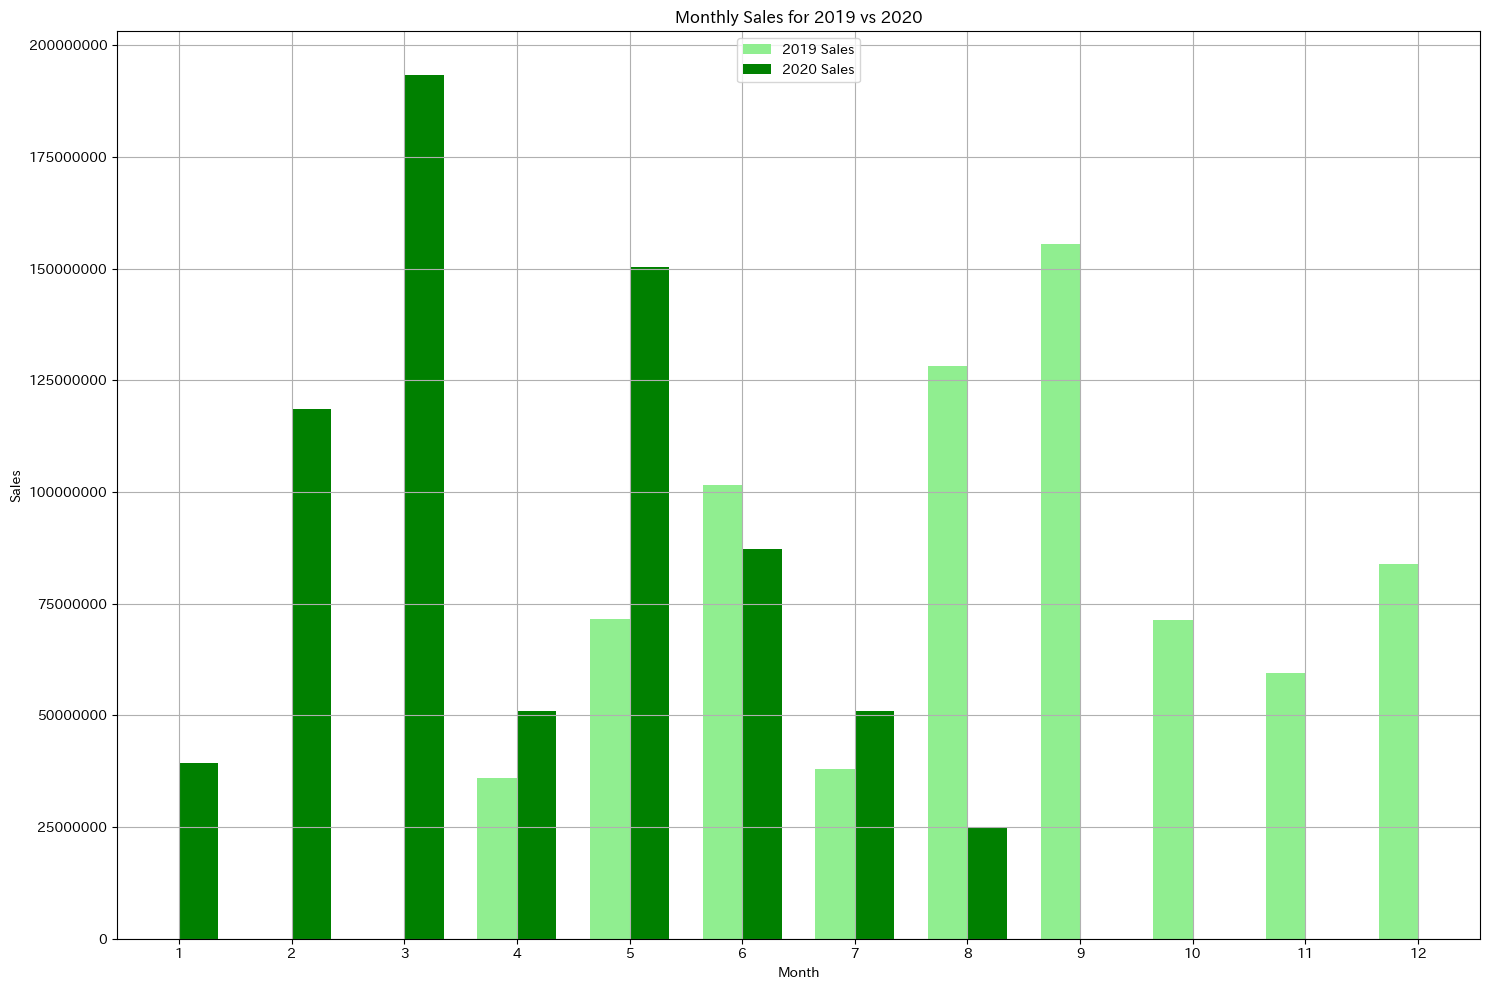

In [92]:
#plot the bar chart
plt.figure(figsize=(15,10))
bar_width = 0.35

index = np.arange(df_monthly_sales_by_year.shape[0])
bar1 = plt.bar(index, df_monthly_sales_by_year['2019_sales'], bar_width, color='lightgreen', label='2019 Sales')
bar2 = plt.bar(index + bar_width, df_monthly_sales_by_year['2020_sales'], bar_width,color='green', label='2020 Sales')

# Stop displaying scientific notation
from matplotlib.ticker import ScalarFormatter
y_formatter = ScalarFormatter(useOffset=False)
y_formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(y_formatter)


plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales for 2019 vs 2020')
plt.xticks(index + bar_width / 2, df_monthly_sales_by_year.index)  # Set the position of the x-ticks
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

## Yearly Sales

          sales
year           
2019  745836468
2020  716136522


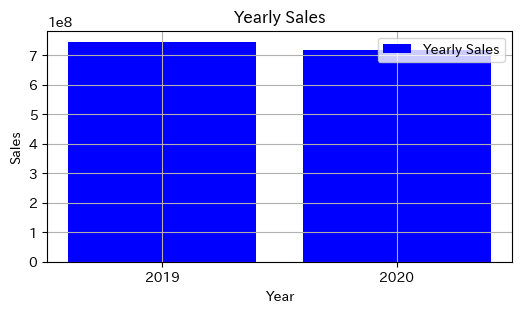

In [34]:
df_yearly_sales = df_daily_sales.resample("Y").sum()
df_yearly_sales = df_yearly_sales[["sales"]]
df_yearly_sales = df_yearly_sales.rename_axis('year')

# Convert 'year' index to string format
df_yearly_sales.index = df_yearly_sales.index.strftime('%Y')
print(df_yearly_sales)

plt.figure(figsize=(6,3))
plt.bar(df_yearly_sales.index, df_yearly_sales['sales'], color='blue', label='Yearly Sales')

plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()